# Project 2: Finance 
 

# Prefactory Remarks

- [x] **Create a virtual environment to download the packages**

In [ ]:
# You don't have to do this, it's just safer.

# Install virtualenv (virtual environment):

# !pip install virtualenv

# Create a virtual environment named "myenv":

# !python -m venv myenv

# Activate the virtual environment:

# myenv\Scripts\activate (Windows)
# source myenv/bin/activate (macOS/Linux)

# Upgrade pip and install essential data science libraries inside the virtual environment:

# !myenv/bin/python -m pip install --upgrade pip  
# !myenv/bin/python -m pip install numpy pandas matplotlib seaborn scikit-learn scipy statsmodels jupyterlab plotly openpyxl xlrd tensorflow keras torch torchvision pyspark ipykernel

# Add the virtual environment as a Jupyter kernel:

# !myenv/bin/python -m ipykernel install --user --name=myenv --display-name "Python (myenv)"

# Deactivate the virtual environment (Run this in the terminal):

# deactivate

- [x] **Libraries we might need to install**

In [45]:
# Run these directly in a cell

#!pip install tensorflow
#!pip install missingno
#!pip install seaborn
#!pip install numpy
#!pip install pandas
#!pip install matplotlib

- [x] **Tips for rearranging your Notebook**

- Hold ctrl+shift and click on the various cells you want to move, then press the arrow keys to move them up or down.

# Data Analysis (Using the Pandas Library)

## 1. Visualize the data

- [x] **Checking the data**

In [22]:
import pandas as pd
import seaborn as sns
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import tensorflow 
import re

df = pd.read_csv("Finance_data.csv")

df

,Transaction ID,Customer ID,Transaction Amount,Date,Account Type,Loan Amount,Loan Approval Status,Transaction Type,Branch ID,Transaction Location,...,Transaction Category,Loan Duration,Interest Rate,Previous Loan Status,Account Balance,Total Deposits,Total Withdrawals,Total Transactions,Pending Transactions,Overdraft Status
0,1,C001,200,2023-01-01,Savings,1000.0,Approved,Deposit,B001,New York,...,Income,24,5.0%,Approved,2000.0,5000.0,1500.0,10.0,No,NaN
1,2,C002,150,2023-01-02,Checking,NaN,Rejected,Withdrawal,B002,Chicago,...,Expense,36,4.5%,Rejected,3500.0,7000.0,2000.0,8.0,Yes,NaN
2,3,C003,350,2023-01-03,Savings,5000.0,Approved,Deposit,B001,Boston,...,Income,48,4.8%,Approved,4500.0,4000.0,1200.0,12.0,No,NaN
3,4,C001,50,2023-01-04,Savings,NaN,Pending,Withdrawal,B003,New York,...,Expense,24,5.0%,Approved,1950.0,5100.0,1450.0,9.0,Yes,NaN
4,5,C004,1000,2023-01-05,Checking,NaN,Approved,Deposit,B004,Los Angeles,...,Income,60,5.5%,Approved,5500.0,9000.0,5000.0,15.0,No,NaN
5,6,C005,75,2023-01-06,Savings,2000.0,Rejected,Withdrawal,B005,Dallas,...,Expense,36,6.0%,Rejected,1500.0,6000.0,1200.0,10.0,Yes,NaN
6,7,C006,250,2023-01-07,Checking,NaN,Pending,Deposit,B002,San Francisco,...,Income,48,4.3%,Pending,4000.0,3500.0,1000.0,7.0,No,NaN
7,8,C003,500,2023-01-08,Savings,NaN,Approved,Deposit,B001,Los Angeles,...,Income,48,4.8%,Approved,4300.0,4500.0,1300.0,11.0,No,NaN
8,9,C007,150,2023-01-09,Investment,10000.0,Approved,Withdrawal,B004,Miami,...,Expense,72,3.9%,Approved,7000.0,15000.0,7000.0,20.0,No,NaN
9,10,C002,500,2023-01-10,Savings,5000.0,Rejected,Deposit,B002,Chicago,...,Income,36,4.5%,Rejected,3300.0,8000.0,2500.0,12.0,Yes,NaN


- [x] **Check the columns' datatypes**

In [3]:
df.dtypes

# the dates should be in datetime format, this is something we have to clean

# Customer age should be an integer, not a float. 

Transaction ID               int64
Customer ID                 object
Transaction Amount           int64
Date                        object
Account Type                object
Loan Amount                float64
Loan Approval Status        object
Transaction Type            object
Branch ID                   object
Transaction Location        object
Customer Age               float64
Customer Income              int64
Customer Marital Status     object
Customer Credit Score        int64
Transaction Method          object
Fee Charged                  int64
Transaction Description     object
Transaction Category        object
Loan Duration                int64
Interest Rate               object
Previous Loan Status        object
Account Balance            float64
Total Deposits             float64
Total Withdrawals          float64
Total Transactions         float64
Pending Transactions        object
Overdraft Status           float64
dtype: object

- [x] **Check the statistics of this data**

In [4]:
df.describe()

,Transaction ID,Transaction Amount,Loan Amount,Customer Age,Customer Income,Customer Credit Score,Fee Charged,Loan Duration,Account Balance,Total Deposits,Total Withdrawals,Total Transactions,Overdraft Status
count,52.000000,52.000000,21.000000,50.000000,52.000000,52.000000,52.000000,52.000000,51.000000,51.000000,51.000000,51.000000,0.0
mean,26.500000,520.096154,4142.857143,39.440000,65096.153846,700.673077,7.153846,41.884615,3857.843137,6905.882353,2477.450980,11.745098,NaN
std,15.154757,461.275396,2515.665206,10.482561,17378.440120,30.082058,3.922707,14.624253,1633.963664,2727.446554,1635.644024,3.315679,NaN
min,1.000000,50.000000,1000.000000,25.000000,30000.000000,620.000000,2.000000,24.000000,1300.000000,3500.000000,1000.000000,7.000000,NaN
25%,13.750000,200.000000,2000.000000,30.000000,53500.000000,690.000000,4.000000,36.000000,2400.000000,4750.000000,1500.000000,9.500000,NaN
50%,26.500000,350.000000,4000.000000,38.000000,63500.000000,700.000000,6.000000,36.000000,3900.000000,6300.000000,1800.000000,11.000000,NaN
75%,39.250000,700.000000,5000.000000,45.000000,75000.000000,720.000000,10.000000,48.000000,4600.000000,8350.000000,2750.000000,14.000000,NaN
max,52.000000,2000.000000,10000.000000,60.000000,95000.000000,750.000000,20.000000,72.000000,8000.000000,15000.000000,8000.000000,20.000000,NaN


## 2. Cleaning the data

- [x] **Check for missing values**

In [249]:
df.isnull().sum()   # As we can see, there are many missing values

# df["Loan Amount"].isnull().value_counts()

Transaction ID              0
Customer ID                 0
Transaction Amount          0
Date                        0
Account Type                0
Loan Amount                31
Loan Approval Status        0
Transaction Type            0
Branch ID                   0
Transaction Location        0
Customer Age                0
Customer Income             0
Customer Marital Status     0
Customer Credit Score       0
Transaction Method          0
Fee Charged                 0
Transaction Description     0
Transaction Category        0
Loan Duration               0
Interest Rate               0
Previous Loan Status        1
Account Balance             1
Total Deposits              1
Total Withdrawals           1
Total Transactions          1
Pending Transactions        1
Overdraft Status           52
Clean Description           0
dtype: int64

- [x] **Check for NaN values in all of the columns, then in a specific set of columns**

In [8]:
# In all columns

print("In all columns:")

df = pd.read_csv("Finance_data.csv")

df

nan_counts = df.isna().sum()

print(nan_counts[nan_counts > 0])

# In a specific set of columns

print("In a specific set of columns:")

X = df[['Account Balance','Loan Amount']]

nan_counts = X.isna().sum()

print(nan_counts[nan_counts > 0])

# We only see NaN values in the Type 2 column, which is perfectly fine, it's supposed to be like that

In all columns:
Loan Amount             31
Customer Age             2
Previous Loan Status     1
Account Balance          1
Total Deposits           1
Total Withdrawals        1
Total Transactions       1
Pending Transactions     1
Overdraft Status        52
dtype: int64
In a specific set of columns:
Account Balance     1
Loan Amount        31
dtype: int64


- [x] **Check for mistakes in the dates** 

In [15]:
df["Date"].value_counts()

df['Date'] = df['Date'].astype(str)  # convert object to string

df['Date']=df['Date'].str.replace('/', '-', regex=False)


df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


df

,Transaction ID,Customer ID,Transaction Amount,Date,Account Type,Loan Amount,Loan Approval Status,Transaction Type,Branch ID,Transaction Location,...,Transaction Category,Loan Duration,Interest Rate,Previous Loan Status,Account Balance,Total Deposits,Total Withdrawals,Total Transactions,Pending Transactions,Overdraft Status
0,1,C001,200,2023-01-01,Savings,1000.0,Approved,Deposit,B001,New York,...,Income,24,5.0%,Approved,2000.0,5000.0,1500.0,10.0,No,NaN
1,2,C002,150,2023-01-02,Checking,NaN,Rejected,Withdrawal,B002,Chicago,...,Expense,36,4.5%,Rejected,3500.0,7000.0,2000.0,8.0,Yes,NaN
2,3,C003,350,2023-01-03,Savings,5000.0,Approved,Deposit,B001,Boston,...,Income,48,4.8%,Approved,4500.0,4000.0,1200.0,12.0,No,NaN
3,4,C001,50,2023-01-04,Savings,NaN,Pending,Withdrawal,B003,New York,...,Expense,24,5.0%,Approved,1950.0,5100.0,1450.0,9.0,Yes,NaN
4,5,C004,1000,2023-01-05,Checking,NaN,Approved,Deposit,B004,Los Angeles,...,Income,60,5.5%,Approved,5500.0,9000.0,5000.0,15.0,No,NaN
5,6,C005,75,2023-01-06,Savings,2000.0,Rejected,Withdrawal,B005,Dallas,...,Expense,36,6.0%,Rejected,1500.0,6000.0,1200.0,10.0,Yes,NaN
6,7,C006,250,2023-01-07,Checking,NaN,Pending,Deposit,B002,San Francisco,...,Income,48,4.3%,Pending,4000.0,3500.0,1000.0,7.0,No,NaN
7,8,C003,500,2023-01-08,Savings,NaN,Approved,Deposit,B001,Los Angeles,...,Income,48,4.8%,Approved,4300.0,4500.0,1300.0,11.0,No,NaN
8,9,C007,150,2023-01-09,Investment,10000.0,Approved,Withdrawal,B004,Miami,...,Expense,72,3.9%,Approved,7000.0,15000.0,7000.0,20.0,No,NaN
9,10,C002,500,2023-01-10,Savings,5000.0,Rejected,Deposit,B002,Chicago,...,Income,36,4.5%,Rejected,3300.0,8000.0,2500.0,12.0,Yes,NaN


- [x] **Change the datatype of Age from float64 to integer64**

In [215]:
df["Customer Age"].value_counts()  

# Here it states that this datatype is already an integer64. Why does it say above that it's a float64? Because there are missing values NaN!

df["Customer Age"] = df["Customer Age"].astype("Int64")  

# Now, we'll complete the NaN values by superseding them with the ceiling function of the average of ages, like so:

average_age = df["Customer Age"].mean()
ceiling_average_age = np.ceil(average_age).astype(int)
df["Customer Age"].fillna(ceiling_average_age, inplace=True)

df["Customer Age"].value_counts()


C:\Users\micro\AppData\Local\Temp\ipykernel_23396\3923626655.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Customer Age"].fillna(ceiling_average_age, inplace=True)


Customer Age
45    8
40    7
35    6
28    6
50    5
60    5
30    4
33    3
25    2
26    2
38    2
32    1
55    1
Name: count, dtype: Int64

- [x] **Check the account balances, total deposits, total withdrawals for unusually large values**

In [155]:
df["Total Deposits"].value_counts()  # check the values for anomalies

# Check the minimum and maximum

df["Total Deposits"].max()   # 15000
df["Total Deposits"].min()   # 3500

disparity_td = df["Total Deposits"].max() - df["Total Deposits"].min()

df["Account Balance"].value_counts()

df["Account Balance"].max()   # 8000
df["Account Balance"].min()   # 1300

disparity_ab = df["Account Balance"].max() - df["Account Balance"].min()

df["Total Withdrawals"].value_counts() 

df["Total Withdrawals"].max()   # 8000
df["Total Withdrawals"].min()   # 1000

disparity_tw = df["Total Withdrawals"].max() - df["Total Withdrawals"].min()

# The plots and analyses in the next sections will solidify if there are any outliers to remove or not

7000.0

- [x] **Look for any other inconsistencies in other columns**

In [206]:
df["Transaction Description"].value_counts()  # clear



Transaction ID               int64
Customer ID                 object
Transaction Amount           int64
Date                        object
Account Type                object
Loan Amount                float64
Loan Approval Status        object
Transaction Type            object
Branch ID                   object
Transaction Location        object
Customer Age               float64
Customer Income              int64
Customer Marital Status     object
Customer Credit Score        int64
Transaction Method          object
Fee Charged                  int64
Transaction Description     object
Transaction Category        object
Loan Duration                int64
Interest Rate               object
Previous Loan Status        object
Account Balance            float64
Total Deposits             float64
Total Withdrawals          float64
Total Transactions         float64
Pending Transactions        object
Overdraft Status           float64
dtype: object

- [x] **Are there any useless columns? (Overdraft Status)**

In [52]:
# Overdraft status doesn't seem to be doing anything there, so I'll remove it

df_new = df.drop(columns=["Overdraft Status"])

df_new

,Transaction ID,Customer ID,Transaction Amount,Date,Account Type,Loan Amount,Loan Approval Status,Transaction Type,Branch ID,Transaction Location,...,Transaction Description,Transaction Category,Loan Duration,Interest Rate,Previous Loan Status,Account Balance,Total Deposits,Total Withdrawals,Total Transactions,Pending Transactions
0,1,C001,200,2023-01-01,Savings,1000.0,0,Deposit,B001,New York,...,Monthly deposit,Income,24,5.0%,Approved,2000.0,5000.0,1500.0,10.0,No
1,2,C002,150,2023-01-02,Checking,NaN,2,Withdrawal,B002,Chicago,...,ATM withdrawal,Expense,36,4.5%,Rejected,3500.0,7000.0,2000.0,8.0,Yes
2,3,C003,350,2023-01-03,Savings,5000.0,0,Deposit,B001,Boston,...,Monthly deposit,Income,48,4.8%,Approved,4500.0,4000.0,1200.0,12.0,No
3,4,C001,50,2023-01-04,Savings,NaN,1,Withdrawal,B003,New York,...,ATM withdrawal,Expense,24,5.0%,Approved,1950.0,5100.0,1450.0,9.0,Yes
4,5,C004,1000,2023-01-05,Checking,NaN,0,Deposit,B004,Los Angeles,...,Direct deposit,Income,60,5.5%,Approved,5500.0,9000.0,5000.0,15.0,No
5,6,C005,75,2023-01-06,Savings,2000.0,2,Withdrawal,B005,Dallas,...,ATM withdrawal,Expense,36,6.0%,Rejected,1500.0,6000.0,1200.0,10.0,Yes
6,7,C006,250,2023-01-07,Checking,NaN,1,Deposit,B002,San Francisco,...,Monthly deposit,Income,48,4.3%,Pending,4000.0,3500.0,1000.0,7.0,No
7,8,C003,500,2023-01-08,Savings,NaN,0,Deposit,B001,Los Angeles,...,Monthly deposit,Income,48,4.8%,Approved,4300.0,4500.0,1300.0,11.0,No
8,9,C007,150,2023-01-09,Investment,10000.0,0,Withdrawal,B004,Miami,...,Investment withdrawal,Expense,72,3.9%,Approved,7000.0,15000.0,7000.0,20.0,No
9,10,C002,500,2023-01-10,Savings,5000.0,2,Deposit,B002,Chicago,...,Monthly deposit,Income,36,4.5%,Rejected,3300.0,8000.0,2500.0,12.0,Yes


## 3. Analysis and visualizations

- [x] **Top spending customers (since we don't have names, use Customer ID as the reference)**

In [29]:
df.groupby('Customer ID')['Transaction Amount'].sum().sort_values(ascending=False)


Customer ID
C001    4150
C003    3750
C007    3750
C010    3700
C004    3100
C009    2350
C002    1800
C008    1800
C006    1570
C005    1075
Name: Transaction Amount, dtype: int64

- [x] **Create a Pie chart of the top spending customers**

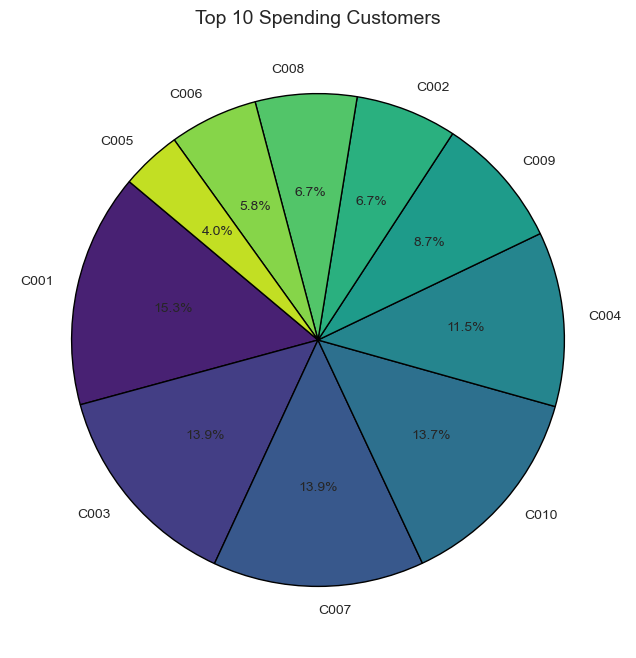

In [96]:
sns.set_style("whitegrid")  

top_spenders = df.groupby('Customer ID')['Transaction Amount'].sum().sort_values(ascending=False)

top_n = 10
top_spenders = top_spenders[:top_n]  # Take only the top 10 (there are only 10 anyways)

# Ensure values are in list format
values = top_spenders.values.tolist()
labels = top_spenders.index.tolist()

# Define Seaborn color palette
colors = sns.color_palette("viridis", len(labels))
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})
plt.title(f"Top {top_n} Spending Customers", fontsize=14)
plt.show()

- [x] **Average transaction amount per customer**

In [34]:
df.groupby('Customer ID')['Transaction Amount'].mean().sort_values(ascending=False)

Customer ID
C010    925.000000
C001    691.666667
C003    625.000000
C007    625.000000
C004    620.000000
C009    587.500000
C008    360.000000
C006    314.000000
C002    300.000000
C005    215.000000
Name: Transaction Amount, dtype: float64

- [x] **Notice that the customers who spend the most overall and on average are not the same. Why not? Is it a mistake?**

No, it just shows that some people make more transactions than others. The more transactions you make, the higher is the integer you must divide by when taking the mean.

- [x] **What is the preferred transaction type per customer?**

In [55]:
df.groupby('Customer ID')['Transaction Type'].count().sort_values(ascending=False)  # who makes more transactions (doesn't differentiate between withdrawal and deposit)

df.groupby('Customer ID')['Transaction Type'].value_counts().groupby(level=0).idxmax()  # Keeps only the transaction type with the highest count.

Customer ID
C001       (C001, Deposit)
C002       (C002, Deposit)
C003       (C003, Deposit)
C004       (C004, Deposit)
C005    (C005, Withdrawal)
C006       (C006, Deposit)
C007       (C007, Deposit)
C008    (C008, Withdrawal)
C009       (C009, Deposit)
C010       (C010, Deposit)
Name: count, dtype: object

- [x] **Top Spenders per Transaction Location**

In [76]:
df.groupby(['Transaction Location', 'Customer ID'])['Transaction Amount'].sum().groupby('Transaction Location').idxmax()


Transaction Location
Boston                  (Boston, C003)
Chicago                (Chicago, C009)
Dallas                  (Dallas, C010)
Los Angeles        (Los Angeles, C004)
Miami                    (Miami, C007)
New York              (New York, C001)
San Francisco    (San Francisco, C010)
Name: Transaction Amount, dtype: object

- [x] **Make a bar plot of the top spenders by location**

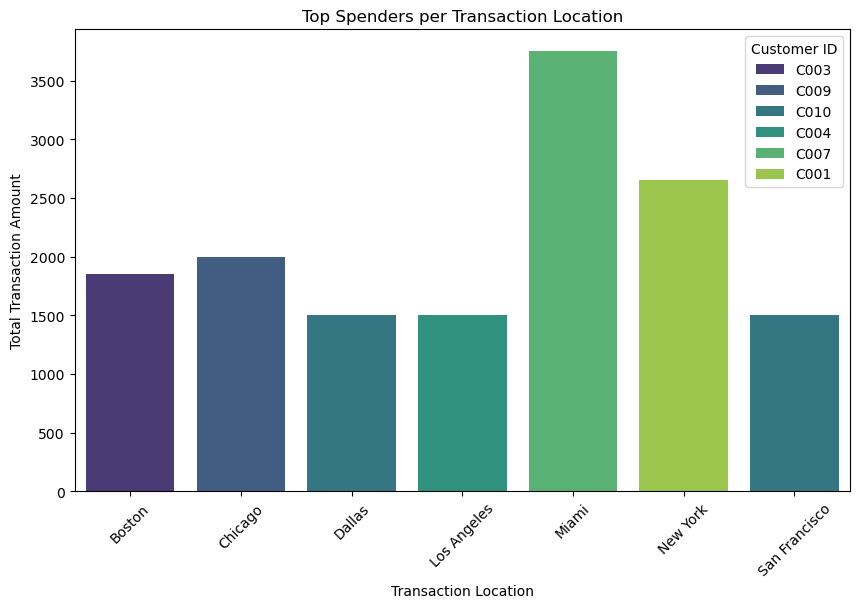

In [79]:
top_spenders = df.groupby(['Transaction Location', 'Customer ID'])['Transaction Amount'].sum().reset_index() # Aggregate total spending per customer at each location

# Get top spender per location
top_spenders = top_spenders.loc[top_spenders.groupby('Transaction Location')['Transaction Amount'].idxmax()]


plt.figure(figsize=(10, 6))
sns.barplot(x='Transaction Location', y='Transaction Amount', hue='Customer ID', data=top_spenders, palette='viridis')

# Formatting
plt.title("Top Spenders per Transaction Location")
plt.xlabel("Transaction Location")
plt.ylabel("Total Transaction Amount")
plt.xticks(rotation=45)  # Rotate labels if needed
plt.legend(title="Customer ID", bbox_to_anchor=(1,1))  # Move legend outside if too many customers

plt.show()

- [x] **Compare total deposits and withdrawals to assess net cash flow**

In [82]:
df.groupby('Transaction Type')['Transaction Amount'].sum().sort_values(ascending=False)

# There are a lot more deposits than withdrawals, so as a net result they lose a lot more than they gain

Transaction Type
Deposit       17920
Withdrawal     9125
Name: Transaction Amount, dtype: int64

- [x] **Create a Box plot of the account balances, total deposits, and total withdrawals**

C:\Users\micro\AppData\Local\Temp\ipykernel_23396\3634432472.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Category", y="Amount", data=df_melted, palette="Set2")


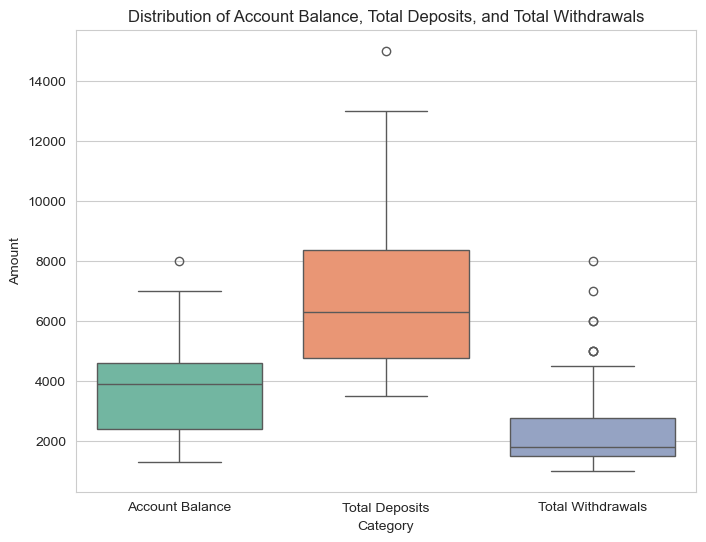

In [135]:
cols = ["Account Balance", "Total Deposits", "Total Withdrawals"]


df_melted = df[cols].melt(var_name="Category", value_name="Amount")             # Reshape data for Seaborn

plt.figure(figsize=(8, 6))
sns.boxplot(x="Category", y="Amount", data=df_melted, palette="Set2")

plt.title("Distribution of Account Balance, Total Deposits, and Total Withdrawals")

plt.show()

# As we can see, we have quite a few outliers, especially in "Total Withdrawals"

- [x] **Create a Violin plot of the account balances, total deposits, and total withdrawals**

C:\Users\micro\AppData\Local\Temp\ipykernel_23396\1866547856.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Category", y="Amount", data=df_melted, palette="muted")


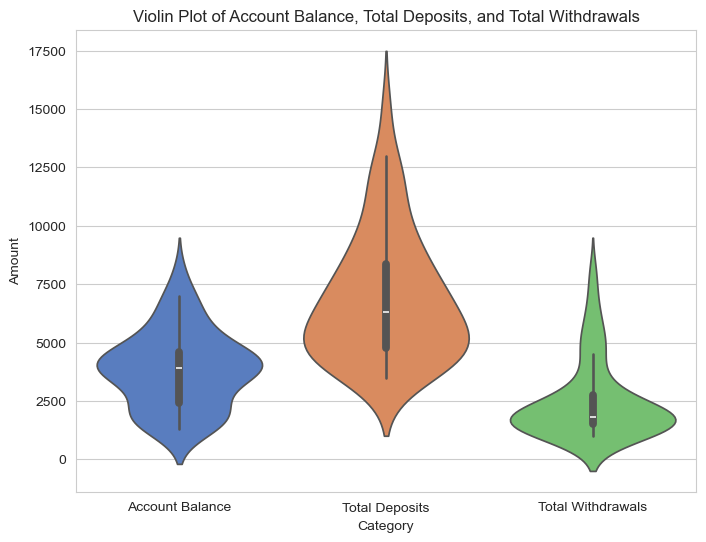

In [137]:
# The width of the violin represents how many data points exist at that value.
# If it's wide, many values are concentrated there, and if it's narrow, few values exist there.
# The thick white dot inside the violin is the median.
# The thin black bar shows the interquartile range (IQR) (25th to 75th percentile).

plt.figure(figsize=(8, 6))
sns.violinplot(x="Category", y="Amount", data=df_melted, palette="muted")

plt.title("Violin Plot of Account Balance, Total Deposits, and Total Withdrawals")

plt.show()

- [x] **Identify transactions that are significantly higher than the customer’s average (85% percentile).**

In [237]:
df.groupby('Customer ID')['Transaction Amount'].mean().sort_values(ascending=False)

df[df['Transaction Amount'] > df['Transaction Amount'].quantile(0.85)]  # Top 15% transactions



,Transaction ID,Customer ID,Transaction Amount,Date,Account Type,Loan Amount,Loan Approval Status,Transaction Type,Branch ID,Transaction Location,...,Loan Duration,Interest Rate,Previous Loan Status,Account Balance,Total Deposits,Total Withdrawals,Total Transactions,Pending Transactions,Overdraft Status,Clean Description
12,13,C010,1500,2023-01-13,Checking,NaN,Approved,Deposit,B004,San Francisco,...,60,4.6%,Approved,5500.0,10000.0,4500.0,14.0,No,NaN,Direct deposit
15,16,C007,2000,2023-01-16,Investment,NaN,Approved,Withdrawal,B004,Miami,...,72,3.9%,Approved,7000.0,12000.0,8000.0,18.0,Yes,NaN,Investment withdrawal
22,23,C003,1500,2023-01-23,Savings,NaN,Approved,Deposit,B003,Boston,...,48,4.8%,Approved,4600.0,4700.0,1500.0,10.0,No,NaN,Direct deposit
30,31,C001,1500,2023-01-31,Checking,NaN,Pending,Deposit,B004,Boston,...,48,4.6%,Pending,4000.0,6000.0,2200.0,13.0,No,NaN,Direct deposit
40,41,C010,1500,2023/02/24,Investment,10000.0,Approved,Withdrawal,B004,Dallas,...,72,4.1%,Approved,8000.0,13000.0,5000.0,20.0,No,NaN,Investment withdrawal
49,50,C009,1500,2023/03/04,Savings,NaN,Approved,Deposit,B005,Chicago,...,36,4.5%,Approved,4200.0,6500.0,2000.0,13.0,No,NaN,Monthly deposit


## 4. String Manipulations

- [x] **Change the first letter of all of the words in the Transaction Description column to uppercase**

In [181]:
df = pd.read_csv("Finance_data.csv")  # See to it that you restart this df after testing the ones that come after this one

df["Transaction Description"].str.title()

0           Monthly Deposit
1            Atm Withdrawal
2           Monthly Deposit
3            Atm Withdrawal
4            Direct Deposit
5            Atm Withdrawal
6           Monthly Deposit
7           Monthly Deposit
8     Investment Withdrawal
9           Monthly Deposit
10              Atm Deposit
11          Online Transfer
12           Direct Deposit
13           Atm Withdrawal
14          Monthly Deposit
15    Investment Withdrawal
16          Online Transfer
17           Atm Withdrawal
18           Direct Deposit
19           Atm Withdrawal
20          Monthly Deposit
21           Atm Withdrawal
22           Direct Deposit
23    Investment Withdrawal
24          Online Transfer
25          Monthly Deposit
26           Direct Deposit
27           Atm Withdrawal
28              Atm Deposit
29       Monthly Withdrawal
30           Direct Deposit
31           Atm Withdrawal
32          Online Transfer
33       Investment Deposit
34           Atm Withdrawal
35          Online T

- [x] **Remove the white spaces (then separately add an underscore to separate them)**

In [191]:
df["Transaction Description"].str.replace(" ", "")  # whitespaces

df= pd.read_csv("Finance_data.csv")

df["Transaction Description"].str.replace(" ","_")  # underscore

0           Monthly_deposit
1            ATM_withdrawal
2           Monthly_deposit
3            ATM_withdrawal
4            Direct_deposit
5            ATM_withdrawal
6           Monthly_deposit
7           Monthly_deposit
8     Investment_withdrawal
9           Monthly_deposit
10              ATM_deposit
11          Online_transfer
12           Direct_deposit
13           ATM_withdrawal
14          Monthly_deposit
15    Investment_withdrawal
16          Online_transfer
17           ATM_withdrawal
18           Direct_deposit
19           ATM_withdrawal
20          Monthly_deposit
21           ATM_withdrawal
22           Direct_deposit
23    Investment_withdrawal
24          Online_transfer
25          Monthly_deposit
26           Direct_deposit
27           ATM_withdrawal
28              ATM_deposit
29       Monthly_withdrawal
30           Direct_deposit
31           ATM_withdrawal
32          Online_transfer
33       Investment_deposit
34           ATM_withdrawal
35          Online_t

- [x] **Now keep only the first word**

In [187]:
df["Transaction Description"].str.split().str[0].str.capitalize()  # split the words into a list, choose the 1st one, and capitalize it


0        Monthly
1            Atm
2        Monthly
3            Atm
4         Direct
5            Atm
6        Monthly
7        Monthly
8     Investment
9        Monthly
10           Atm
11        Online
12        Direct
13           Atm
14       Monthly
15    Investment
16        Online
17           Atm
18        Direct
19           Atm
20       Monthly
21           Atm
22        Direct
23    Investment
24        Online
25       Monthly
26        Direct
27           Atm
28           Atm
29       Monthly
30        Direct
31           Atm
32        Online
33    Investment
34           Atm
35        Online
36        Direct
37       Monthly
38           Atm
39       Monthly
40    Investment
41       Monthly
42        Online
43        Direct
44           Atm
45        Online
46    Investment
47           Atm
48           Atm
49       Monthly
50           Atm
51        Online
Name: Transaction Description, dtype: object

- [x] **Remove non-alphanumeric characters**

In [221]:
df["Transaction Description"].str.replace(r'[^a-zA-Z0-9 ]', '', regex=True)


0           Monthly deposit
1            ATM withdrawal
2           Monthly deposit
3            ATM withdrawal
4            Direct deposit
5            ATM withdrawal
6           Monthly deposit
7           Monthly deposit
8     Investment withdrawal
9           Monthly deposit
10              ATM deposit
11          Online transfer
12           Direct deposit
13           ATM withdrawal
14          Monthly deposit
15    Investment withdrawal
16          Online transfer
17           ATM withdrawal
18           Direct deposit
19           ATM withdrawal
20          Monthly deposit
21           ATM withdrawal
22           Direct deposit
23    Investment withdrawal
24          Online transfer
25          Monthly deposit
26           Direct deposit
27           ATM withdrawal
28              ATM deposit
29       Monthly withdrawal
30           Direct deposit
31           ATM withdrawal
32          Online transfer
33       Investment deposit
34           ATM withdrawal
35          Online t

- [x] **Get a substring of the string**

In [224]:
df["Transaction Description"].str[0:3]  


0     Mon
1     ATM
2     Mon
3     ATM
4     Dir
5     ATM
6     Mon
7     Mon
8     Inv
9     Mon
10    ATM
11    Onl
12    Dir
13    ATM
14    Mon
15    Inv
16    Onl
17    ATM
18    Dir
19    ATM
20    Mon
21    ATM
22    Dir
23    Inv
24    Onl
25    Mon
26    Dir
27    ATM
28    ATM
29    Mon
30    Dir
31    ATM
32    Onl
33    Inv
34    ATM
35    Onl
36    Dir
37    Mon
38    ATM
39    Mon
40    Inv
41    Mon
42    Onl
43    Dir
44    ATM
45    Onl
46    Inv
47    ATM
48    ATM
49    Mon
50    ATM
51    Onl
Name: Transaction Description, dtype: object

- [x] **Replace multiple substrings with different values**

In [198]:
replacements = {"ATM": "Automated Teller Machine", "deposit": "depositing funds"}
df["Transaction Description"] = df["Transaction Description"].replace(replacements, regex=True)

df["Transaction Description"].value_counts()

Transaction Description
Automated Teller Machine withdrawal                   15
Monthly depositing fundsing funds                     12
Direct depositing fundsing funds                       8
Online transfer                                        8
Investment withdrawal                                  5
Automated Teller Machine depositing fundsing funds     2
Monthly withdrawal                                     1
Investment depositing fundsing funds                   1
Name: count, dtype: int64

# Data Science (Using the Pandas Library)

## 5. Inferential Statistics

- [x] **Confidence Intervals for the Account Balance column**

In [5]:
# We've seen before that the "Account Balance" column had a missing value, so we must take care of it first

df = df.dropna(subset=["Account Balance"])  # drop the null values

import scipy.stats as stats


mean = np.mean(df['Account Balance'])
std_error = stats.sem(df['Account Balance'])
confidence_interval = stats.t.interval(0.95, len(df['Account Balance'])-1, loc=mean, scale=std_error)

print(f"95% Confidence Interval: {confidence_interval}")


95% Confidence Interval: (3398.2834512929203, 4317.402823216884)


- [x] **Show the correlation matrix for this dataframe (exclude all columns that aren't int64 and float64, and other irrelevant columns)**

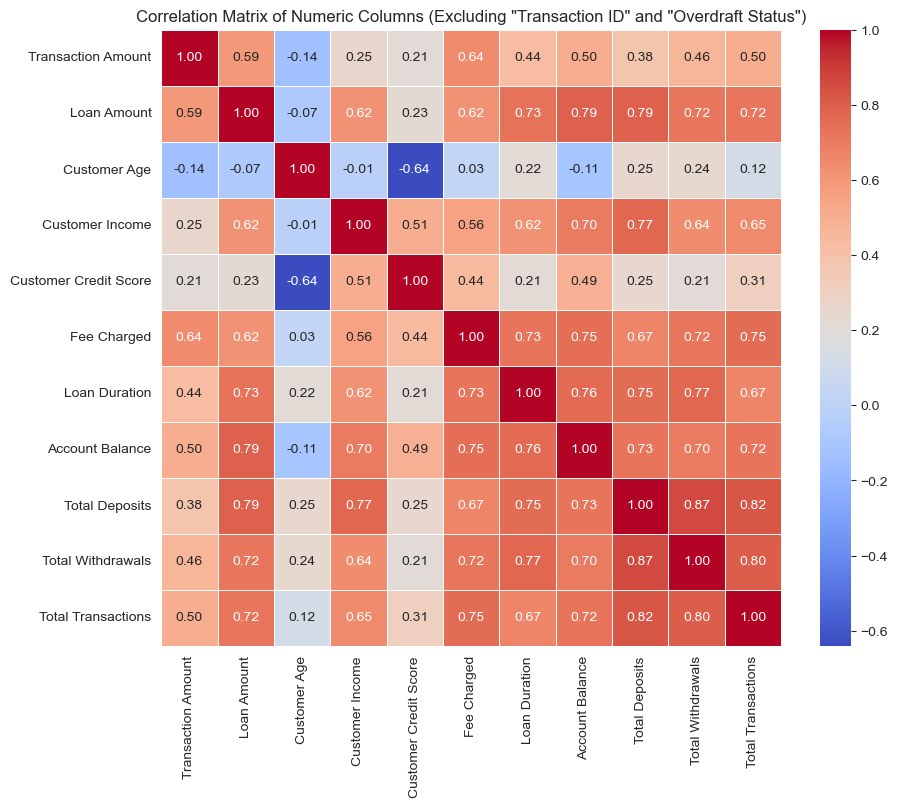

In [263]:
import seaborn as sns
import matplotlib.pyplot as plt

df_filtered = df.drop(columns=['Transaction ID', 'Overdraft Status'])

numeric_columns = df_filtered.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Columns (Excluding "Transaction ID" and "Overdraft Status")')
plt.show()



- [x] **A/B Testing for Marketing Campaigns**
  
  **Scenario**: Suppose you're testing two different versions of a promotional offer (e.g., one offering 10% off vs. another offering $20 off).
  
  **Dataset Columns to Use**:
  - Transaction Amount
  - Customer Feedback
  - Discount Applied
  - Customer Age
  - Account Type

  **Task**: Perform an A/B test to compare the performance of these two promotional offers. The key hypothesis might be that the "10% off" offer increases spending more than the "$20 off" offer.
    
  **Analysis**: Perform statistical analysis (like a t-test or chi-square test) to compare the average transaction amounts and determine if one offer has statistically significant higher spending than the other.

In [13]:
df.isnull().sum() # no missing values

df['Discount Applied'] = df['Transaction Amount'].apply(
    lambda x: '10% off' if x > 100 else '$20 off')


df['Customer Feedback'] = df['Transaction Amount'].apply(
    lambda x: np.random.choice([1, 0]) if x > 50 else 0)        

df_ab_test = df[['Transaction Amount', 'Discount Applied', 'Customer Feedback', 'Customer Age', 'Account Type']]

df_ab_test.dropna(subset=['Transaction Amount', 'Discount Applied'], inplace=True)


group_10_percent = df_ab_test[df_ab_test["Discount Applied"] == "10% off"]
group_20_dollars = df_ab_test[df_ab_test["Discount Applied"] == "$20 off"]

from scipy import stats

# Perform an independent t-test
t_stat, p_value = stats.ttest_ind(group_10_percent["Transaction Amount"], group_20_dollars["Transaction Amount"])

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-statistic: 2.2927641160303973
P-value: 0.02619341726606658


C:\Users\micro\AppData\Local\Temp\ipykernel_20144\4269150903.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Discount Applied'] = df['Transaction Amount'].apply(
C:\Users\micro\AppData\Local\Temp\ipykernel_20144\4269150903.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Customer Feedback'] = df['Transaction Amount'].apply(
C:\Users\micro\AppData\Local\Temp\ipykernel_20144\4269150903.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cav

- [x] **Probabilistic Modeling for Risk Assessment**

  **Scenario**: You're analyzing the probability that a customer will default on a loan.
  
  **Dataset Columns to Use**:
  - Customer Credit Score
  - Loan Amount
  - Income
  - Account Balance
  - Loan Approval Status
    
  **Task**: Use probability (e.g., logistic regression) to estimate the probability that a customer will default based on their credit score, income, loan amount, and other relevant factors.
  
  **Analysis**: You can then use inferential statistics to identify significant predictors of loan default, such as whether customers with low credit scores or high loan amounts are more likely to default.

$H_0$:

$H_a$:

C:\Users\micro\ansel\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC-ROC Score: 1.0
Accuracy Score: 0.75
Recall Score: 0.6666666666666666
F1 Score: 0.8
              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67         1
         1.0       1.00      0.67      0.80         3

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4



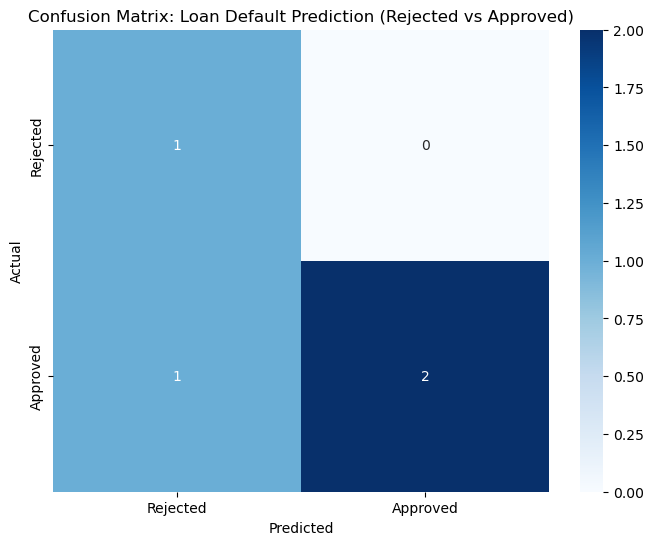

In [68]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create synthetic income based on Account Type 

df = pd.read_csv("Finance_data.csv")

def generate_income(account_type, age):
    if account_type == "Savings":
        return np.random.randint(50000, 150000)    # Higher income for savings accounts 
    elif account_type == "Checking": 
        return np.random.randint(30000, 80000)    # Lower income for checking accounts
    else:
        return np.random.randint(40000, 100000)   # Default case: mid-range income


df['Income'] = df.apply(lambda row: generate_income(row['Account Type'], row['Customer Age']), axis=1)

df['Loan Approval Status'] = df['Loan Approval Status'].map({'Approved': 1, 'Rejected': 0, 'Pending': None})
df= df.dropna(subset=['Customer Credit Score', 'Loan Amount', 'Income', 'Account Balance', 'Loan Approval Status','Customer Age'])
 


X = df[['Customer Credit Score', 'Loan Amount', 'Income', 'Account Balance']]
y = df['Loan Approval Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
c_m = confusion_matrix(y_test, y_pred)
a_s_2 = accuracy_score(y_test, y_pred)
r_s = recall_score(y_test, y_pred)
f1_s = f1_score(y_test, y_pred)
c_r = classification_report(y_test, y_pred)


y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities of the default class (1)
a_s = roc_auc_score(y_test, y_prob)

print(f"AUC-ROC Score: {a_s}")
print(f"Accuracy Score: {a_s_2}")
print(f"Recall Score: {r_s}")
print(f"F1 Score: {f1_s}")
print(c_r)



# coefficients = model.coef_[0]
# features = X.columns

plt.figure(figsize=(8,6))
sns.heatmap(c_m, annot=True, fmt="d", cmap="Blues", xticklabels=["Rejected", "Approved"], yticklabels=["Rejected", "Approved"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix: Loan Default Prediction (Rejected vs Approved)")
plt.show()


### Model's conclusions

- AUC-ROC Score: 1.0, indicating perfect separation between classes.

- Accuracy: 75%, but this can be misleading in imbalanced datasets.

- Recall: 67%, meaning 1 default case was missed.

- F1 Score: 0.8, balancing precision and recall well.

- AUC suggests strong model performance, but recall indicates some loan defaults are missed.

- To evaluate predictor significance, perform statistical testing on coefficients. If p-value < 0.05, reject $H_0$ for that variable, concluding it significantly impacts loan default.

The model is very small so we can't really do much with these results, the dataset must be bigger.

- [x] **Predictive Modeling with Probabilistic Methods**
 
**Scenario**: Predicting whether a customer will purchase a product or not.
 
  **Dataset Columns to Use**:
  - Transaction History
  - Customer Age
  - Customer Location
  - Transaction Amount
  - Spending Category
    
  **Task**: Build a probabilistic model (such as Bayesian Networks or Naive Bayes) to predict the likelihood that a customer will purchase a specific product or service based on their demographics and transaction history.
  
  **Analysis**: Infer the probability of a customer purchasing the product by evaluating customer features, such as age, income, and spending habits.

C:\Users\micro\AppData\Local\Temp\ipykernel_20144\4133368941.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Transaction History'] = df.groupby('Customer ID')['Transaction ID'].transform('count')
C:\Users\micro\AppData\Local\Temp\ipykernel_20144\4133368941.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Customer Location'] = df['Customer ID'].apply(lambda x: random.choice(locations))
C:\Users\micro\AppData\Local\Temp\ipykernel_20144\4133368941.py:19: SettingWithCopyWarning: 
A value is tryin

   Transaction History Customer Location Spending Category
0                    6            Dallas              High
1                    6     San Francisco            Medium
2                    6          New York              High
3                    6             Miami            Medium
4                    5             Miami              High
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

[[5 0]
 [0 5]]


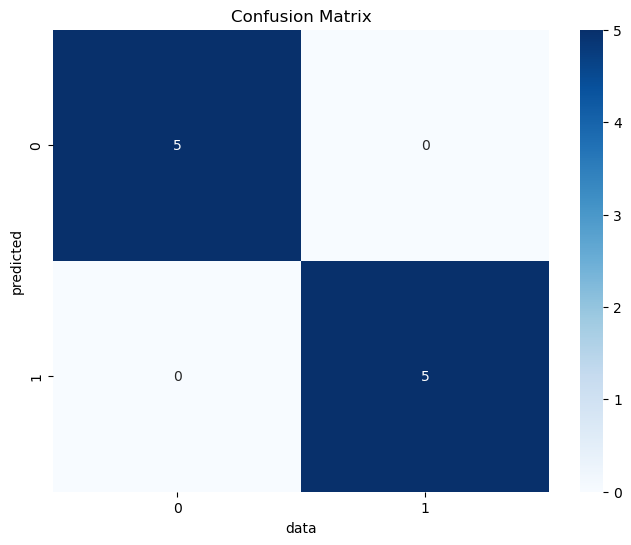

In [11]:
import random

# Create Transaction History based on the number of transactions per Customer ID

df['Transaction History'] = df.groupby('Customer ID')['Transaction ID'].transform('count')

# Assign random locations to customers

locations = ['New York', 'Los Angeles', 'Chicago', 'Houston', 'San Francisco', 'Miami', 'Dallas', 'Boston']
df['Customer Location'] = df['Customer ID'].apply(lambda x: random.choice(locations))

# Categorize transactions into spending categories
def categorize_spending(amount):
    if amount < 50:
        return "Low"
    elif 50 <= amount < 200:
        return "Medium"
    else:
        return "High"

df['Spending Category'] = df['Transaction Amount'].apply(categorize_spending)


df_clean = df.dropna(subset=['Transaction History', 'Customer Age', 'Customer Location', 'Transaction Amount', 'Spending Category'])

from sklearn.preprocessing import LabelEncoder

# Encode categorical variables (e.g., Customer Location, Spending Category)
label_encoder = LabelEncoder()

df_clean['Customer Location'] = label_encoder.fit_transform(df_clean['Customer Location'])
df_clean['Spending Category'] = label_encoder.fit_transform(df_clean['Spending Category'])

some_threshold = df['Transaction Amount'].median()

# Assume 'Purchased Product' is the target column, where 1 = purchased, 0 = not purchased
# If 'Purchased Product' doesn't exist, create it based on conditions in your dataset.

df_clean['Purchased Product'] = (df_clean['Transaction Amount'] > some_threshold).astype(int)


X = df_clean[['Transaction History', 'Customer Age', 'Customer Location', 'Transaction Amount', 'Spending Category']]
y = df_clean['Purchased Product']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix

y_pred = nb_model.predict(X_test)
conf_m = confusion_matrix(y_test,y_pred)

print(classification_report(y_test, y_pred))

print(conf_m)

plt.figure(figsize=(8,6))
sns.heatmap(conf_m, annot=True, fmt="d", cmap="Blues")
plt.xlabel("data")
plt.ylabel("predicted")
plt.title("Confusion Matrix")
plt.show()


# 6. Neural Networks

- [x] **Predict Loan approval** Can a neural network predict loan approval status (approved/rejected) based on customer data?

- $H_0$: Loan approval status cannot be predicted significantly better than random chance using this neural network.

- $H_a$: Loan approval status can be predicted significantly better than random chance.

In [95]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras

df = pd.read_csv("Finance_data.csv")

df['Loan Approval Status'] = df['Loan Approval Status'].map({'Approved': 1, 'Rejected': 0, 'Pending': None})
df['Previous Loan Status'] = df['Previous Loan Status'].map({'Approved': 1, 'Rejected': 0, 'Pending': None})


df= df.dropna(subset=['Customer Age','Loan Approval Status', 'Customer Income', 'Account Balance', 'Previous Loan Status'])


X = df[['Customer Age', 'Customer Income', 'Account Balance', 'Previous Loan Status']]
y = df['Loan Approval Status']


if len(df) > 1:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
else:
    raise ValueError("Not enough data to split. Add more samples to the dataset.")


model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.fit(X_train, y_train, epochs=10, batch_size=32)


loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


C:\Users\micro\ansel\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.6801 - loss: 1682.9130
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6697 - loss: 802.2195
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6801 - loss: 38.9782
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.3303 - loss: 1014.3203
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.3695 - loss: 445.5820
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6801 - loss: 229.8274
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6697 - loss: 451.1185
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6801 - loss: 494.0454
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6697 - loss: 445.2864
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6801 - loss: 261.0456
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - accuracy: 0.5556 - loss: 41.5574
Test Accuracy: 0.5556


### Model's conclusions

Unstable Loss: Large fluctuations suggest scaling issues or poor learning rate.

Inconsistent Accuracy: Ranges from 33% to 68%, indicating weak generalization.

Poor Test Performance: 55.56% accuracy, barely above random guessing.

Unstable Training Loss: The loss fluctuates significantly between epochs (e.g., from 1682.91 → 38.97 → 1014.32), indicating potential issues like improper feature scaling or a suboptimal learning rate.

The model struggles to learn meaningful patterns due to limited data.


In [93]:
df = pd.read_csv("Finance_data.csv")

df.isna().sum()

df["Previous Loan Status"].value_counts()

Previous Loan Status
Approved    31
Rejected    15
Pending      5
Name: count, dtype: int64

- [x] **Predict Fraud Detection**

In [22]:
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler
import numpy as np


X = df[['Transaction Amount', 'Account Balance', 'Customer Income']]
X_scaled = StandardScaler().fit_transform(X)

# Build an autoencoder model for anomaly detection

model = models.Sequential([
    layers.Dense(64, activation='relu', input_dim=X_scaled.shape[1]),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(X_scaled.shape[1], activation='sigmoid')
])

model.compile(optimizer='adam', loss='mse')

model.fit(X_scaled, X_scaled, epochs=50, batch_size=256, validation_split=0.2)

# Calculate reconstruction error to detect anomalies

X_pred = model.predict(X_scaled)
mse = np.mean(np.power(X_scaled - X_pred, 2), axis=1)

# Flag transactions with high MSE as anomalies (potential fraud)

threshold = np.percentile(mse, 95)  # choose top 5% as the anomalies
anomalies = df[mse > threshold]


print(anomalies)


C:\Users\micro\ansel\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: nan - val_loss: nan
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - loss: nan - val_loss: nan
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: nan - val_loss: nan
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - loss: nan - val_loss: nan
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: nan - val_loss: nan
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: nan - val_loss: nan
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: nan - val_loss: nan
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: nan - val_loss: nan
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - loss: nan - val_loss: nan
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: nan - val_loss: nan
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: nan - val_loss: nan
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - loss: nan - val_loss: nan
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - loss: nan -

- [x] **Customer Credit Scoring**

In [49]:
# Regression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from tensorflow import keras

X = df[['Customer Age', 'Customer Income', 'Account Balance', 'Total Transactions']]
y = df['Customer Credit Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')


model.fit(X_train, y_train, epochs=10, batch_size=32)


predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)


C:\Users\micro\ansel\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 1189626.5000
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 495008.7500
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 493841.7188
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 492846.4375
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 492947.5938
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 494823.4062
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 492798.7812
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 493819.4688
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 491064.4688
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 495158.9062
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


## 8. PCA (Principal Component Analysis) 

PCA can reduce the number of features before using Random Forest, Logistic Regression, Linear Regression, or Gradient Boosting to improve efficiency.

- $H_0$: The principal components do not significantly reduce dimensionality while preserving variance.

- $H_a$: The principal components capture most of the variance, allowing for dimensionality reduction with minimal information loss.

Explained Variance Ratio: [0.62047096 0.19555033 0.05439213]


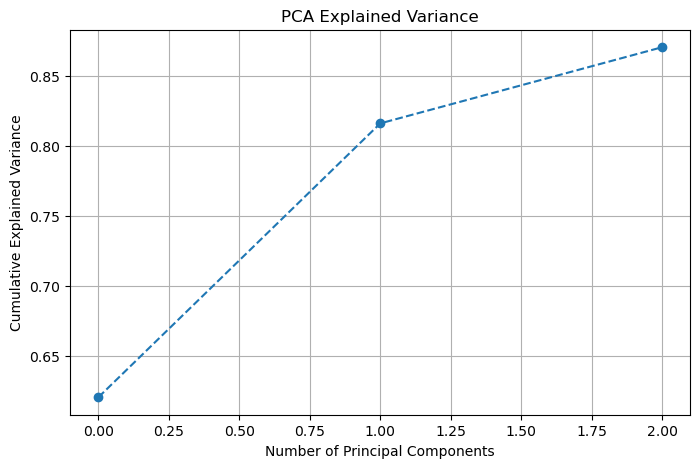

In [110]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("Finance_data.csv")

features = ['Customer Age', 'Customer Income', 'Customer Credit Score', 
            'Account Balance', 'Total Deposits', 'Total Withdrawals', 
            'Total Transactions', 'Fee Charged', 
            'Loan Duration']


df = df.dropna(subset=features)  
X = df[features]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA(n_components=3)  
X_pca = pca.fit_transform(X_scaled)
df[['PCA1', 'PCA2', 'PCA3']] = X_pca


explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)


plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid()
plt.show()

### Model's conclusions

PCA1 explains 62% of the variance, meaning most information is captured by one component.

PCA2 adds 19.5%, bringing total explained variance to 81.6%.

PCA3 contributes little (5.4%), so more components don’t add much value.

Graph shows diminishing returns after two components → use PCA1 & PCA2 for analysis.

Since PCA1 & PCA2 explain most of the variance, we reject $H_0$ → a few features dominate the dataset’s structure.

## 7. K-MeansClustering

Grouping similar customers or transactions. For instance, you could use K-Means clustering to segment customers into different groups based on their Customer Income, Age, Account Balance, etc. These segments could represent different customer profiles like "high income, low spending" or "young and frequent transactor."

- $H_0$: Customers do not naturally group into distinct clusters based on financial behavior.

- $H_a$: Customers do form distinct clusters based on their financial attributes.

C:\Users\micro\ansel\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\micro\ansel\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\micro\ansel\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\micro\ansel\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when

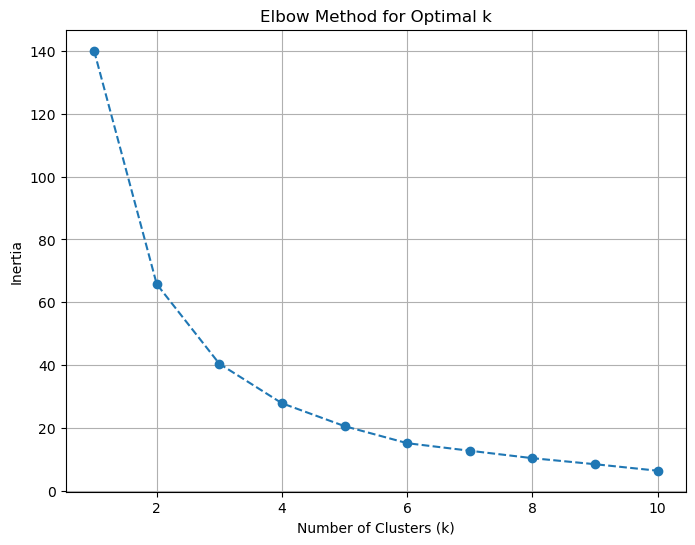

C:\Users\micro\ansel\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


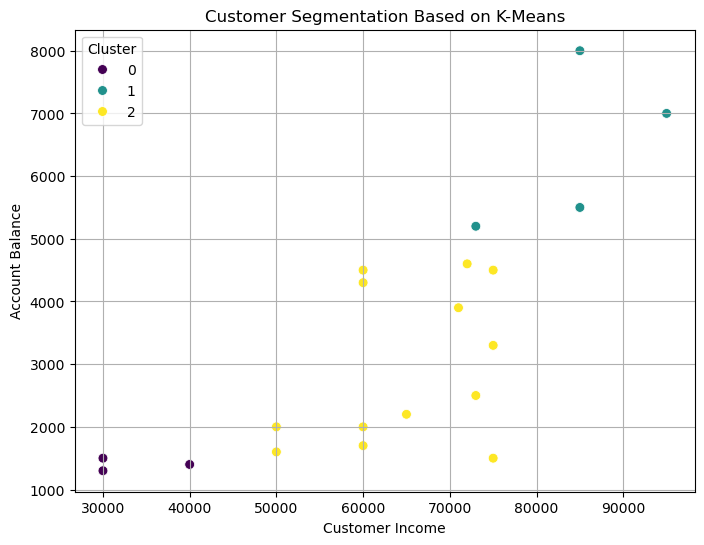

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


df = pd.read_csv("Finance_data.csv")


features = ['Customer Age', 'Customer Income', 'Total Transactions', 
            'Total Deposits', 'Total Withdrawals', 'Loan Amount', 'Account Balance']
df = df.dropna(subset=features)  
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8,6))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Customer Income'], y=df['Account Balance'], hue=df['Cluster'], palette='viridis', s=50)
plt.xlabel('Customer Income')
plt.ylabel('Account Balance')
plt.title('Customer Segmentation Based on K-Means')
plt.legend(title="Cluster")
plt.grid()
plt.show()


### Model's conclusions

The points are well aggregated into 3 separate groups with no intersections, indicating that the model has successfully identified distinct clusters of customers based on their financial behaviors.

Since the clusters are well-separated, we reject H₀. There is significant evidence that customers form distinct groups based on their financial attributes.

## 9. Linear Regression

- [x] **Loan Amount:** Predict how much loan amount a customer might apply for, based on 'Customer Income', 'Customer Credit Score', 'Total Deposits', 'Total Withdrawals', 'Previous Loan Status'.

  
Account Balance: Predict the current account balance based on transaction history, deposits, withdrawals, etc.
Interest Rate: Predict the interest rate a customer might get for a loan.

- $H_0$: there is no significant relationship between the independent variables (e.g., Customer Income, Customer Credit Score, Total Deposits, etc.) and the dependent variable (Loan Amount)

- $H_a$: The alternative hypothesis states that there is a significant relationship between at least one of the independent variables and the dependent variable.

Missing values in each column:
Transaction ID              0
Customer ID                 0
Transaction Amount          0
Date                        0
Account Type                0
Loan Amount                31
Loan Approval Status        0
Transaction Type            0
Branch ID                   0
Transaction Location        0
Customer Age                2
Customer Income             0
Customer Marital Status     0
Customer Credit Score       0
Transaction Method          0
Fee Charged                 0
Transaction Description     0
Transaction Category        0
Loan Duration               0
Interest Rate               0
Previous Loan Status        1
Account Balance             1
Total Deposits              1
Total Withdrawals           1
Total Transactions          1
Pending Transactions        1
Overdraft Status           52
dtype: int64
Mean Absolute Error (MAE): 1001.2566327560797
Mean Squared Error (MSE): 1610114.7688855543
Root Mean Squared Error (RMSE): 1268.9029785155185
R-sq

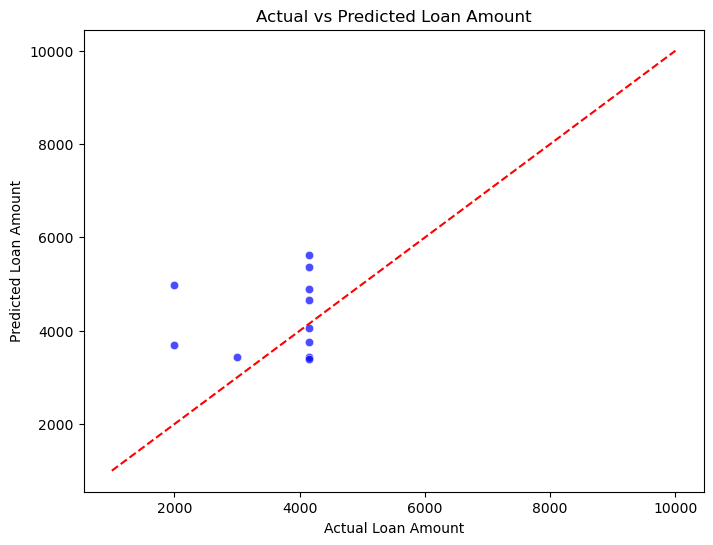

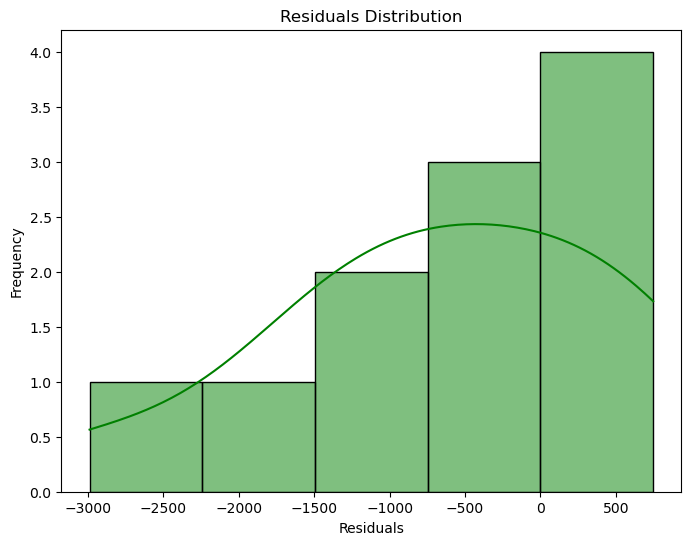

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

df = pd.read_csv("finance_data.csv")

# Check for missing values in the dataset
print(f"Missing values in each column:\n{df.isnull().sum()}")

# If there are missing values, handle them
# Impute missing values (you can also use other strategies like filling with the median)
imputer = SimpleImputer(strategy='mean')  # You can change to 'median' or 'most_frequent'
df[['Customer Income', 'Customer Credit Score', 'Total Deposits', 'Total Withdrawals', 'Loan Amount']] = imputer.fit_transform(
    df[['Customer Income', 'Customer Credit Score', 'Total Deposits', 'Total Withdrawals', 'Loan Amount']]
)

# Encoding categorical variables if necessary

label_encoder = LabelEncoder()
df['Previous Loan Status'] = label_encoder.fit_transform(df['Previous Loan Status'])


X = df[['Customer Income', 'Customer Credit Score', 'Total Deposits', 'Total Withdrawals', 'Previous Loan Status']]
y = df['Loan Amount']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
pred_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

# Plotting actual vs predicted loan amount

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')  # Ideal line
plt.xlabel("Actual Loan Amount")
plt.ylabel("Predicted Loan Amount")
plt.title("Actual vs Predicted Loan Amount")
plt.show()

# Visualize the residuals

plt.figure(figsize=(8, 6))
sns.histplot(y_test - y_pred, kde=True, color='green')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")
plt.show()

## Model's Conclusions

These results suggest that the model is not performing well. The negative R² value indicates that the model's predictions are worse than simply predicting the mean of the target variable. Additionally, the high MAE, MSE, and RMSE values indicate significant prediction errors.

With only 52 rows of data, the model is underfitting and unable to generalize well.

The small sample size is a major limitation, and the model's performance would likely improve with more data.

The null hypothesis (no relationship between predictors and Loan Amount) cannot be rejected, as the model does not demonstrate a significant predictive relationship.


## 10. Gradient Boosting

Classification: Like Random Forest, Gradient Boosting can be used to predict categorical outcomes, such as Loan Approval Status (approved/denied).

Regression: It can also predict continuous outcomes, such as Loan Amount, Account Balance, or Interest Rate.

- $H_0$: the features do not predict loan approval effectively

- $H_a$: the features effectively predict loan approval

C:\Users\micro\AppData\Local\Temp\ipykernel_20948\3069847325.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Previous Loan Status'].fillna(df['Previous Loan Status'].mode()[0], inplace=True)
C:\Users\micro\ansel\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:58:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%
F1 Score: 100.00%


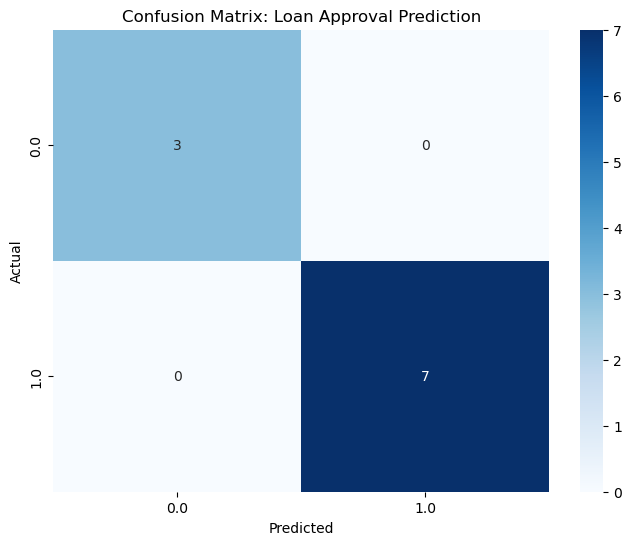

In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv("Finance_data.csv")

# Handling missing values for numerical columns
# Impute numerical columns with the median (better for skewed distributions)
# df['Loan Amount'].fillna(df['Loan Amount'].median(), inplace=True)
# df['Account Balance'].fillna(df['Account Balance'].median(), inplace=True)
# df['Total Deposits'].fillna(df['Total Deposits'].median(), inplace=True)
# df['Total Withdrawals'].fillna(df['Total Withdrawals'].median(), inplace=True)
# df['Total Transactions'].fillna(df['Total Transactions'].median(), inplace=True)

df['Previous Loan Status'].fillna(df['Previous Loan Status'].mode()[0], inplace=True)


df = df.dropna(subset=['Loan Approval Status'])

df["Loan Approval Status"] = df["Loan Approval Status"].map({"Approved": 1, "Rejected": 0, "Pending": None})
df = df.dropna(subset=['Loan Approval Status'])  # Drop 'Pending' values (now NaN)


df["Previous Status"] = df["Previous Loan Status"].map({"Approved": 1, "Rejected": 0, "Pending": None})


df = df.dropna(subset=['Previous Status'])


label_encoder = LabelEncoder()
df['Previous Status'] = label_encoder.fit_transform(df['Previous Status'])


X_class = df[['Customer Income', 'Customer Credit Score', 'Previous Status']]
y_class = df['Loan Approval Status']


X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)


model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
model.fit(X_train_class, y_train_class)
y_pred = model.predict(X_test_class)


c_m = confusion_matrix(y_test_class, y_pred)
a_s = accuracy_score(y_test_class, y_pred)
p_s = precision_score(y_test_class, y_pred)
r_s = recall_score(y_test_class, y_pred)
f1 = f1_score(y_test_class, y_pred)


print("Accuracy: {:.2f}%".format(a_s * 100))
print("Precision: {:.2f}%".format(p_s * 100))
print("Recall: {:.2f}%".format(r_s * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))


plt.figure(figsize=(8, 6))
sns.heatmap(c_m, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix: Loan Approval Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Model conclusions

Perfect Performance: 100% accuracy, precision, recall, and F1 score, with no misclassifications in the confusion matrix.

Ideal results suggest overfitting or a simple, well-separated dataset, but in this case, it reflects the absence of enough data.


Given the perfect performance, we would reject $H_0$.

## 11. Random Forest and Decision Tree

 Predicting categorical outcomes. For example, you can use Random Forest to predict whether a Loan Approval Status is approved or denied (binary classification).
 
Regression: Predicting continuous outcomes. For example, predicting Loan Amount, Account Balance, or Interest Rate based on other features.

- $H_0$: There is no significant relationship between the features (Customer Age, Customer Income, Customer Credit Score, Previous Loan Status) and the Loan Approval Status.

- $H_a$: There is a significant relationship between the features and the Loan Approval Status.

Accuracy: 100.00%
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         3
         1.0       1.00      1.00      1.00         6

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



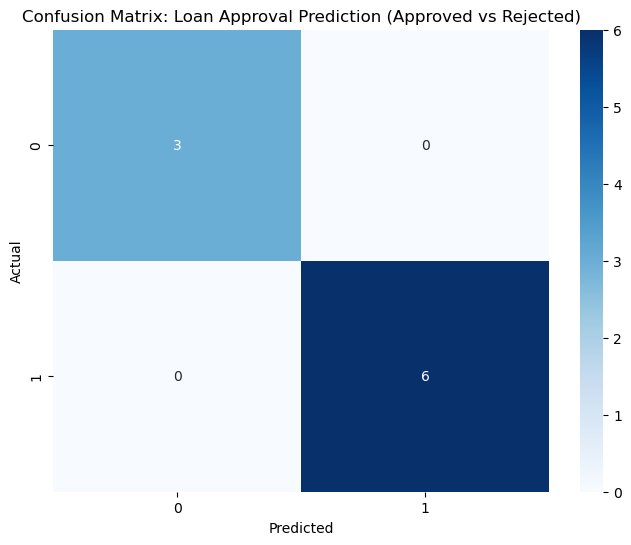

In [17]:
# Classification

# Necessary imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler


df = pd.read_csv("Finance_data.csv")

df["Loan Approval Status"] = df["Loan Approval Status"].map({"Approved": 1, "Rejected": 0, "Pending": None})
df = df.dropna(subset=['Loan Approval Status'])

df["Previous Loan Status"] = df["Previous Loan Status"].map({"Approved": 1, "Rejected": 0, "Pending": None})
df = df.dropna(subset=['Previous Loan Status'])

X = df[['Customer Age', 'Customer Income', 'Customer Credit Score', 'Previous Loan Status']]
y = df['Loan Approval Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = RandomForestClassifier(random_state=42, max_depth=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


c_m = confusion_matrix(y_test, y_pred)
a_s = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


print("Accuracy: {:.2f}%".format(a_s * 100))
print(class_report)


plt.figure(figsize=(8,6))
sns.heatmap(c_m, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Confusion Matrix: Loan Approval Prediction (Approved vs Rejected)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



# # Regression Task
# X_reg = df[['Customer Age', 'Customer Income', 'Customer Credit Score', 'Previous Loan Status']]
# y_reg = df['Loan Amount']

# reg = RandomForestRegressor(n_estimators=100)
# reg.fit(X_reg, y_reg)

### Model's conclusions

This accuracy of 100% indicates that the model has perfectly classified all instances in the test set.

Based on the accuracy, precision, recall, and F1-score, your model has performed flawlessly on this small dataset (all metrics show a perfect score). 

We must recognize that the dataset is very small (only 9 samples), which increases the likelihood of overfitting. The model may have memorized the training data rather than generalizing well to unseen data, which is a classic issue when working with such a small dataset.

Use k-fold cross-validation to assess model performance across different subsets of the dataset. This would help mitigate the risk of overfitting.

# Data Analysis (Using the PySpark Library)

# Data Science (Using the PySpark Library)

# Transfering the data to MySQL

- [x] **Original Dataset**

In [14]:
# Since we have a lot of columns, it's better to give a general argument:

df = pd.read_csv("finance_data.csv")

df.columns = [col.replace(" ", "_") for col in df.columns]

# We must also change the "date" column to something else, 
# since date is a reserved keyword and a function in sql

df = df.rename(columns={'Date': 'Dated'})

df.to_csv("SQL_Finance_data.csv")


# If this downloads as an xls file, go on Google and search for "xls to csv|Cloud convert" and convert that file to csv, it should work


,Transaction_ID,Customer_ID,Transaction_Amount,Date,Account_Type,Loan_Amount,Loan_Approval_Status,Transaction_Type,Branch_ID,Transaction_Location,...,Transaction_Category,Loan_Duration,Interest_Rate,Previous_Loan_Status,Account_Balance,Total_Deposits,Total_Withdrawals,Total_Transactions,Pending_Transactions,Overdraft_Status
0,1,C001,200,2023-01-01,Savings,1000.0,Approved,Deposit,B001,New York,...,Income,24,5.0%,Approved,2000.0,5000.0,1500.0,10.0,No,NaN
1,2,C002,150,2023-01-02,Checking,NaN,Rejected,Withdrawal,B002,Chicago,...,Expense,36,4.5%,Rejected,3500.0,7000.0,2000.0,8.0,Yes,NaN
2,3,C003,350,2023-01-03,Savings,5000.0,Approved,Deposit,B001,Boston,...,Income,48,4.8%,Approved,4500.0,4000.0,1200.0,12.0,No,NaN
3,4,C001,50,2023-01-04,Savings,NaN,Pending,Withdrawal,B003,New York,...,Expense,24,5.0%,Approved,1950.0,5100.0,1450.0,9.0,Yes,NaN
4,5,C004,1000,2023-01-05,Checking,NaN,Approved,Deposit,B004,Los Angeles,...,Income,60,5.5%,Approved,5500.0,9000.0,5000.0,15.0,No,NaN
5,6,C005,75,2023-01-06,Savings,2000.0,Rejected,Withdrawal,B005,Dallas,...,Expense,36,6.0%,Rejected,1500.0,6000.0,1200.0,10.0,Yes,NaN
6,7,C006,250,2023-01-07,Checking,NaN,Pending,Deposit,B002,San Francisco,...,Income,48,4.3%,Pending,4000.0,3500.0,1000.0,7.0,No,NaN
7,8,C003,500,2023-01-08,Savings,NaN,Approved,Deposit,B001,Los Angeles,...,Income,48,4.8%,Approved,4300.0,4500.0,1300.0,11.0,No,NaN
8,9,C007,150,2023-01-09,Investment,10000.0,Approved,Withdrawal,B004,Miami,...,Expense,72,3.9%,Approved,7000.0,15000.0,7000.0,20.0,No,NaN
9,10,C002,500,2023-01-10,Savings,5000.0,Rejected,Deposit,B002,Chicago,...,Income,36,4.5%,Rejected,3300.0,8000.0,2500.0,12.0,Yes,NaN


- [x] **Clean Dataset**

In [ ]:
# Since we have a lot of columns, it's better to give a general argument:

df = pd.read_csv("clean_finance_data.csv")

df.columns = [col.replace(" ", "_") for col in df.columns]

# We must also change the "date" column to something else, 
# since date is a reserved keyword and a function in sql

df = df.rename(columns={'Date': 'Dated'})

df.to_csv("SQL_clean_Finance_data.csv")


# If this downloads as an xls file, go on Google and search for "xls to csv|Cloud convert" and convert that file to csv, it should work
